## Load data
This data contains the players saved positions and rotations during the virtual city walk.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Behavior_new_02715e7a-5a68-471b-9e63-f056c5f0df81.csv')
# df['valid']
# df.head(50)

df.columns
# df

Index(['Unnamed: 0', 'valid', 'leftBlink', 'rightBlink', 'ETWTime',
       'ETWoriginX', 'ETWoriginY', 'ETWoriginZ', 'ETWdirectionX',
       'ETWdirectionY', 'ETWdirectionZ', 'HON', 'ETLoriginX', 'ETLoriginY',
       'ETLoriginZ', 'ETLdirectionX', 'ETLdirectionY', 'ETLdirectionZ',
       'HToriginX', 'HToriginY', 'HToriginZ', 'HTdirectionX', 'HTdirectionY',
       'HTdirectionZ'],
      dtype='object')

In [2]:
df["HON"].unique()

array(['ObjectNames', nan, 'Empty'], dtype=object)

First we get the player origin locations and direction. We can see some rows have NaN and, therefore, we
get rid of them and reset the row index.

In [3]:
df_clean = df.dropna().reset_index(drop=True)

df_clean.head(50)

,Unnamed: 0,valid,leftBlink,rightBlink,ETWTime,ETWoriginX,ETWoriginY,ETWoriginZ,ETWdirectionX,ETWdirectionY,...,ETLoriginZ,ETLdirectionX,ETLdirectionY,ETLdirectionZ,HToriginX,HToriginY,HToriginZ,HTdirectionX,HTdirectionY,HTdirectionZ
0,0.000,1.0,0.0,0.0,58.655426,13.412971,12.306775,21.046938,0.942591,0.099437,...,-0.026742,0.086533,0.113068,0.989807,13.420355,12.303403,21.029396,0.969479,-0.037709,-0.242255
1,0.018,1.0,0.0,0.0,58.666626,13.412885,12.306769,21.046755,0.942547,0.099320,...,-0.026736,0.086563,0.112869,0.989822,547.551270,2.045723,589.369324,0.969452,-0.037648,-0.242376
2,0.021,1.0,0.0,0.0,58.666626,13.412885,12.306769,21.046755,0.942547,0.099320,...,-0.026736,0.086563,0.112869,0.989822,547.551270,2.045723,589.369324,0.969452,-0.037648,-0.242376
3,0.103,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
4,0.105,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
5,0.106,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
6,0.107,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
7,0.108,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
8,0.109,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
9,0.110,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171


In [8]:
player_origin = df_clean[['HToriginX', 'HToriginY', 'HToriginZ']]

player_origin2 = player_origin

player_origin2
# player_origin2.to_csv('/Users/johnmadrid/Google Drive/Osnabrück/WS 2021/NeuroBioPsuchology_2021/Thesis/Players_positions_directions/positionsTestFull.csv', index=False)
player_origin2

,HToriginX,HToriginY,HToriginZ
0,13.420355,12.303403,21.029396
1,547.551270,2.045723,589.369324
2,547.551270,2.045723,589.369324
3,547.551208,2.045722,589.369141
4,547.551208,2.045722,589.369141
...,...,...,...
163427,527.346741,2.038607,593.383911
163428,527.346741,2.038620,593.384033
163429,527.346741,2.038561,593.384155
163430,527.346741,2.038495,593.384338


This exploratory analysis allows to see the range of the positions for the player during the virtual walk which is as expected. Namely, positions on the y-axis stay around zero (player  is sitting on a chair, then positions are stable), x and y axis values range between 500 to 650 approx, which also seems correct (this correspond to the limits of the area in the city where participants were instructed to do the walk.


<Figure size 504x360 with 0 Axes>

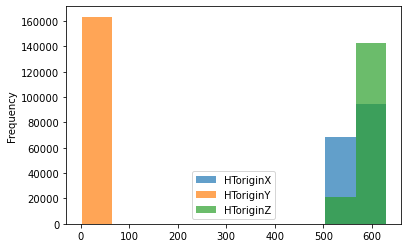

In [15]:
plt.figure(figsize=(7,5))

ax = player_origin2.plot(kind="hist", alpha=0.7)
plt.show()

In [16]:
player_direction = df_clean[['HTdirectionX', 'HTdirectionY', 'HTdirectionZ']]

player_direction.tail()

,HTdirectionX,HTdirectionY,HTdirectionZ
163427,-0.341758,0.026704,-0.939409
163428,-0.342585,0.026923,-0.939102
163429,-0.343687,0.027117,-0.938693
163430,-0.344554,0.027179,-0.938373
163431,-0.345481,0.027203,-0.938032


In [ ]:
player_direction2 = player_direction
# player_direction2.to_csv('/Users/johnmadrid/Google Drive/Osnabrück/WS 2021/NeuroBioPsuchology_2021/Thesis/Players_positions_directions/directionsTestFull.csv', index=False)


<AxesSubplot:>

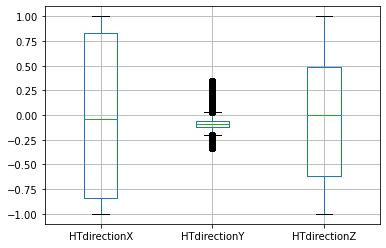

In [67]:
player_direction.boxplot()

In [52]:
eyes_local_origin = df_clean[["ETLoriginX", "ETLoriginY", "ETLoriginZ"]]

eyes_local_origin

,ETLoriginX,ETLoriginY,ETLoriginZ
0,-0.000092,0.002522,-0.026742
1,0.000083,0.002523,-0.026736
2,0.000083,0.002523,-0.026736
3,0.000257,0.002521,-0.026730
4,0.000257,0.002521,-0.026730
...,...,...,...
163427,-0.031765,-0.000271,-0.030184
163428,-0.031782,-0.000256,-0.030173
163429,-0.031544,-0.000074,-0.030771
163430,-0.031239,-0.000459,-0.029431


<AxesSubplot:ylabel='Frequency'>

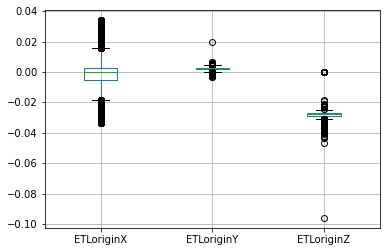

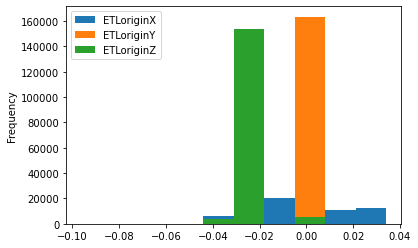

In [53]:
eyes_local_origin.boxplot()

eyes_local_origin.plot.hist()


In [54]:
eyes_local_direction = df_clean[["ETLdirectionX", "ETLdirectionY", "ETLdirectionZ"]]

eyes_local_direction.head(50)

,ETLdirectionX,ETLdirectionY,ETLdirectionZ
0,0.086533,0.113068,0.989807
1,0.086563,0.112869,0.989822
2,0.086563,0.112869,0.989822
3,0.086624,0.115112,0.989563
4,0.086624,0.115112,0.989563
5,0.086624,0.115112,0.989563
6,0.086624,0.115112,0.989563
7,0.086624,0.115112,0.989563
8,0.086624,0.115112,0.989563
9,0.086624,0.115112,0.989563


<AxesSubplot:ylabel='Frequency'>

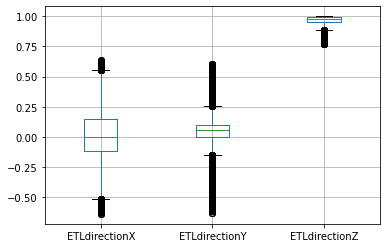

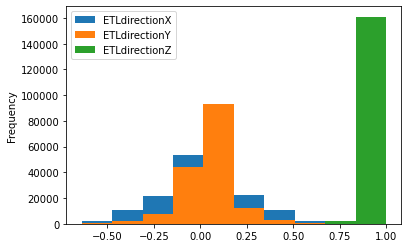

In [57]:
eyes_local_direction.boxplot()
eyes_local_direction.plot.hist()

In [68]:
eyes_world_direction = df_clean[["ETWdirectionX", "ETWdirectionY", "ETWdirectionZ"]]

eyes_world_direction.head()

,ETWdirectionX,ETWdirectionY,ETWdirectionZ
0,0.942591,0.099437,-0.325585
1,0.942547,0.099320,-0.325718
2,0.942547,0.099320,-0.325718
3,0.942298,0.102535,-0.325898
4,0.942298,0.102535,-0.325898


<AxesSubplot:ylabel='Frequency'>

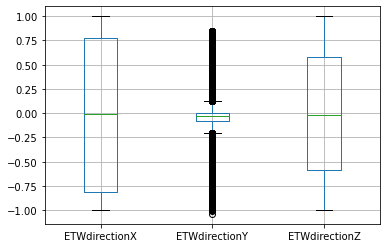

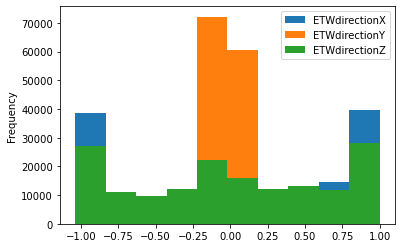

In [66]:
eyes_world_direction.boxplot()

eyes_world_direction.plot.hist()

Explore for HTorigin values bigger than initial 547.551270 in player_direction

In [64]:
# player_origin.loc[player_origin['HToriginX'] > 625.551270, ['HToriginX']]
#
# player_origin.describe()